In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import random

In [ ]:
random.seed(1)

data_dir = './GSE61260/'

In [ ]:
df = pd.read_csv(os.path.join(data_dir, 'combined.csv'))

df.head()

,Sample_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283787,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,Disease
0,GSM1501013,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,...,-0.246719,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,normal control
1,GSM1501014,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,...,0.040158,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,healthy obese
2,GSM1501015,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,...,-0.248596,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,normal control
3,GSM1501016,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,...,-0.086860,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,normal control
4,GSM1501017,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,...,0.337941,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,normal control


In [ ]:
le = LabelEncoder()

y = le.fit_transform(df['Disease'])

X = df.drop(columns = ['Sample_ID', 'Disease'])
X.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283740,ENSG00000283787,ENSG00000283907,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552
0,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,3.010408,...,0.324708,-0.246719,3.031789,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849
1,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,3.464364,...,0.598294,0.040158,1.819534,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320
2,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,2.829070,...,0.647441,-0.248596,1.914932,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879
3,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,2.733645,...,0.446519,-0.086860,1.313128,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271
4,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,2.708227,...,0.820740,0.337941,4.507792,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)

(106, 21661)
(27, 21661)


In [ ]:
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=42, class_weight='balanced')) 
]
pipeline = ImbPipeline(pipeline_steps)
print("\nDefined Pipeline:")
print(pipeline)


Defined Pipeline:
Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier', SVC(class_weight='balanced', random_state=42))])



Starting RandomizedSearchCV on Pipeline...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\jaydn\Documents\Projects\Human-Liver-RNA-Seq-Gene-Expression-Analysis\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 30 is smaller than n_iter=500. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV on Pipeline complete.

Best hyperparameters found for the pipeline:
{'classifier__kernel': 'linear', 'classifier__C': np.float64(0.001)}

Best cross-validation score:
0.562376824714487

Best Pipeline Model:
Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 SVC(C=np.float64(0.001), class_weight='balanced',
                     kernel='linear', random_state=42))])

--- Evaluation of Best Tuned Pipeline on Test Set ---
Accuracy: 0.7778

Classification Report:
                precision    recall  f1-score   support

 healthy obese       0.67      0.80      0.73         5
         nafld       1.00      0.25      0.40         4
          nash       0.67      0.80      0.73         5
normal control       0.80      1.00      0.89         8
           pbc       1.00      1.00      1.00         2
           psc       1.00      0.67      0.80         3

      accuracy                           0.78  

<Axes: >

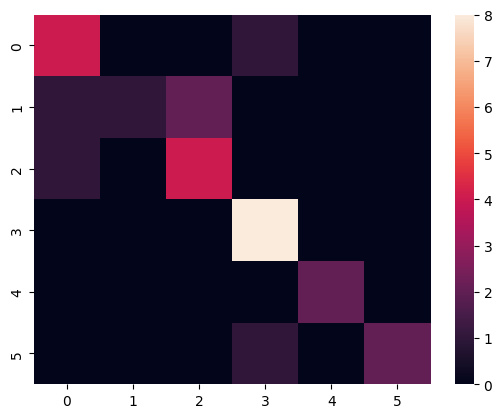

In [ ]:


param_dist = [
    {
        'classifier__kernel': ['linear'],
        'classifier__C': np.logspace(-3, 3, 5),
    },
    
    {
        'classifier__kernel': ['rbf'],
        'classifier__C': np.logspace(-3, 3, 5),
        'classifier__gamma': np.logspace(-3, 3, 5),
    },
]

random_search_pipeline = RandomizedSearchCV(
    estimator=pipeline,                
    param_distributions=param_dist,  
    n_iter=100,                        
    cv=10,                            
    scoring='f1_weighted',             
    verbose=2,                         
    random_state=1,                   
    n_jobs=-1                          
)

print("\nStarting RandomizedSearchCV on Pipeline...")
random_search_pipeline.fit(X_train, y_train)
print("RandomizedSearchCV on Pipeline complete.")

print("\nBest hyperparameters found for the pipeline:")
print(random_search_pipeline.best_params_)

print("\nBest cross-validation score:")
print(random_search_pipeline.best_score_)

best_pipeline_model = random_search_pipeline.best_estimator_
print("\nBest Pipeline Model:")
print(best_pipeline_model)

y_pred_tuned = best_pipeline_model.predict(X_test)

print("\n--- Evaluation of Best Tuned Pipeline on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))


best_scaler = best_pipeline_model.named_steps['scaler']
best_classifier = best_pipeline_model.named_steps['classifier']

conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)